In [29]:
# using warnings module to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Developed and Tested on Python=3.8.10
!pip install numpy==1.24.2
!pip install pandas==1.5.3
!pip install matplotlib==3.7.0
!pip install seaborn==0.12.2
!pip install scikit_learn==1.2.2
!pip install projectpro --upgrade

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [30]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import sys
from projectpro import checkpoint,data_pipeline, mo_distance, preserve, save_point, feedback, show_video
checkpoint('fcTel1')

In [31]:
# Set the locale to the user's default (e.g., 'en_US.UTF-8')
locale.setlocale(locale.LC_ALL, '')

'LC_CTYPE=en_US.UTF-8;LC_NUMERIC=lg_UG.UTF-8;LC_TIME=lg_UG.UTF-8;LC_COLLATE=en_US.UTF-8;LC_MONETARY=lg_UG.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=lg_UG.UTF-8;LC_NAME=lg_UG.UTF-8;LC_ADDRESS=lg_UG.UTF-8;LC_TELEPHONE=lg_UG.UTF-8;LC_MEASUREMENT=lg_UG.UTF-8;LC_IDENTIFICATION=lg_UG.UTF-8'

In [32]:
# These codes are useful when working with large datasets

# sets the maximum number of columns that will be displayed in a dataframe to 200 for improved data viewing
pd.set_option('display.max_columns', 200)
# sets the maximum number of columns that will be displayed in a dataframe to 300 for improved data viewing
pd.set_option('display.max_rows', 300)

In [33]:
# Sets numpy print options to display entire arrays regardless of size
np.set_printoptions(threshold=sys.maxsize)

# Set print options to suppress scientific notation
np.set_printoptions(suppress=True)

In [34]:
# data reading with csv
df = pd.read_csv('https://s3.amazonaws.com/projex.dezyre.com/telecom-data-analysis-project/materials/raw_telecom_data.csv')

In [7]:
df.shape

(653753, 74)

In [19]:
df.head(15)

Customer ID  Month of Joining  Month  zip_code  Gender  Age Married  \
0   hthjctifkiudi0                 1      1     71638  Female   36      No   
1   uqdtniwvxqzeu1                 6      6     72566    Male    1      No   
2   uqdtniwvxqzeu1                 6      7     72566    Male    1      No   
3   uqdtniwvxqzeu1                 6      8     72566    Male    1      No   
4   uqdtniwvxqzeu1                 6      9     72566    Male    1      No   
5   uqdtniwvxqzeu1                 6     10     72566    Male    1      No   
6   uqdtniwvxqzeu1                 6     11     72566    Male    1      No   
7   uqdtniwvxqzeu1                 6     12     72566    Male    1      No   
8   uqdtniwvxqzeu1                 6     13     72566    Male    1      No   
9   uqdtniwvxqzeu1                 6     14     72566    Male    1      No   
10  ojzonexnucycb3                11     11     92697     NaN   63     Yes   
11  ojzonexnucycb3                11     12     92697     NaN   63     Yes   
12  ojzonexnucycb3                11     13     92697     NaN   63     Yes   
13  ojzonexnucycb3                11     14     92697     NaN   63     Yes   
14  nzxifoxtjpktc4                 9      9     92364  Female   37     NaN   

       Dependents  Number of Dependents    Location ID           Service ID  \
0              No                     0  jeavwsrtakgq0  bfbrnsqreveeuafgps0   
1              No                     0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1   
2              No                     0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1   
3              No                     0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1   
4              No                     0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1   
5              No                     0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1   
6              No                     0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1   
7              No                     0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1   
8              No                     0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1   
9              No                     0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1   
10  Not Specified                     0  orajhldeivqe3  cymakrjewdotkoirwb3   
11  Not Specified                     0  orajhldeivqe3  cymakrjewdotkoirwb3   
12  Not Specified                     0  orajhldeivqe3  cymakrjewdotkoirwb3   
13  Not Specified                     0  orajhldeivqe3  cymakrjewdotkoirwb3   
14             No                     0  faainbiydhag4  ywzgormzsybamoeobo4   

   state                 county             timezone  area_codes country  \
0     AR          Chicot County      America/Chicago       870.0      US   
1     AR           Izard County      America/Chicago       870.0      US   
2     AR           Izard County      America/Chicago       870.0      US   
3     AR           Izard County      America/Chicago       870.0      US   
4     AR           Izard County      America/Chicago       870.0      US   
5     AR           Izard County      America/Chicago       870.0      US   
6     AR           Izard County      America/Chicago       870.0      US   
7     AR           Izard County      America/Chicago       870.0      US   
8     AR           Izard County      America/Chicago       870.0      US   
9     AR           Izard County      America/Chicago       870.0      US   
10    CA          Orange County  America/Los_Angeles       714.0      US   
11    CA          Orange County  America/Los_Angeles       714.0      US   
12    CA          Orange County  America/Los_Angeles       714.0      US   
13    CA          Orange County  America/Los_Angeles       714.0      US   
14    CA  San Bernardino County  America/Los_Angeles    442760.0      US   

    latitude  longitude     arpu   roam_ic  roam_og  loc_og_t2t  loc_og_t2m  \
0      33.52     -91.43   273.07     18.88    78.59      280.32       30.97   
1      36.22     -92.08  -329.96     69.46    72.08      255.73      148.80   
2      36.22     -92.08   101.22   1012

In [9]:
df.columns

Index(['Customer ID', 'Month of Joining', 'Month', 'zip_code', 'Gender', 'Age',
       'Married', 'Dependents', 'Number of Dependents', 'Location ID',
       'Service ID', 'state', 'county', 'timezone', 'area_codes', 'country',
       'latitude', 'longitude', 'arpu', 'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'night_pck_user', 'fb_user', 'aug_vbc_5g', 'Churn Value',
       'Referred a Friend', 'Number of Referrals', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Suppo

Univariate analysis

In [10]:
# Looking at the Customer ID column, let's find out how many customers we have over how many months.
len(df["Customer ID"].unique())

98230

In [17]:
# To get the number of unique months in the dataset
len(df["Month"].unique())

14

98,230 unique customers in the dataset, and the data spans across 14 months.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653753 entries, 0 to 653752
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer ID                 653753 non-null  object 
 1   Month of Joining            653753 non-null  int64  
 2   Month                       653753 non-null  int64  
 3   zip_code                    653753 non-null  int64  
 4   Gender                      643729 non-null  object 
 5   Age                         653753 non-null  int64  
 6   Married                     639377 non-null  object 
 7   Dependents                  629129 non-null  object 
 8   Number of Dependents        653753 non-null  int64  
 9   Location ID                 653753 non-null  object 
 10  Service ID                  653753 non-null  object 
 11  state                       653753 non-null  object 
 12  county                      652835 non-null  object 
 13  timezone      

We can confirm that the Customer ID column has no null values, so do Month of Joining and Month

Let us plot how many customers are joining in each month

In [18]:
# To generate a bar plot of the count of customers who joined the telecom service in each month, sorted by month
df['Month of Joining'].astype(int).value_counts().sort_index().plot.bar(figsize=(10,5))
plt.title('Count of Customers Joining, by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

**Observation**:  A large number of customers joined in June. 
- A seasonal promotion or marketing campaign that was particularly effective, 
- External factors such as changes in the market or industry. 

Further analysis and context would be needed to make a more informed hypothesis.

In [20]:
# Distribution of customers across months
customers_per_month = df.groupby("Month")["Customer ID"].nunique()

# Plotting the distribution of customers across months
customers_per_month.plot(kind="bar", figsize=(10, 6))
plt.title("Number of Customers per Month")
plt.xlabel("Month")
plt.ylabel("Number of Customers")
plt.show()

**Observation**: Steady increase in number of customers from Jan to May, then sharp increase from June onwards. 
There is a slight drop from 12 to 14, signalling churn. 

In [28]:
df["Customer ID"].unique()[:5]

array(['hthjctifkiudi0', 'uqdtniwvxqzeu1', 'ojzonexnucycb3',
       'nzxifoxtjpktc4', 'zcpjiqpcepwze6'], dtype=object)

In [33]:
type(df[df["Customer ID"]=='uqdtniwvxqzeu1'])

pandas.core.frame.DataFrame

In [38]:
# Looking at the first 5 customers' journey. When they joined and did any leave before month 14
# df['Customer ID'].isin(df["Customer ID"].unique()[:5]) checks if the customer ID is in the first 5 unique customer IDs
customer_journey = df.loc[df['Customer ID'].isin(df["Customer ID"].unique()[:5]),['Customer ID','Month of Joining', 'Month']]
customer_journey

Customer ID  Month of Joining  Month
0   hthjctifkiudi0                 1      1
1   uqdtniwvxqzeu1                 6      6
2   uqdtniwvxqzeu1                 6      7
3   uqdtniwvxqzeu1                 6      8
4   uqdtniwvxqzeu1                 6      9
5   uqdtniwvxqzeu1                 6     10
6   uqdtniwvxqzeu1                 6     11
7   uqdtniwvxqzeu1                 6     12
8   uqdtniwvxqzeu1                 6     13
9   uqdtniwvxqzeu1                 6     14
10  ojzonexnucycb3                11     11
11  ojzonexnucycb3                11     12
12  ojzonexnucycb3                11     13
13  ojzonexnucycb3                11     14
14  nzxifoxtjpktc4                 9      9
15  nzxifoxtjpktc4                 9     10
16  nzxifoxtjpktc4                 9     11
17  nzxifoxtjpktc4                 9     12
18  nzxifoxtjpktc4                 9     13
19  zcpjiqpcepwze6                 9      9
20  zcpjiqpcepwze6                 9     10
21  zcpjiqpcepwze6                 9     11
22  zcpjiqpcepwze6                 9     12
23  zcpjiqpcepwze6                 9     13
24  zcpjiqpcepwze6                 9     14

uqdtniwvxqzeu1, ojzonexnucycb3, zcpjiqpcepwze6 joined and stayed till month 14. However nzxifoxtjpktc4 and hthjctifkiudi0 churned.

In [39]:
# Compute basic statistics of count of rows per customer
df.groupby(['Customer ID']).size().describe()

count    98230.000000
mean         6.655329
std          3.377418
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         14.000000
dtype: float64

**Observation**:
The average duration of a customer is 6 months, possible hypotheses:

* The company needs to improve their customer retention strategies to increase the average duration of customers.

* The company needs to evaluate their pricing strategies to retain customers for a longer duration.

* The company need to focus on improving the quality of their services to increase customer loyalty and prolong their duration of service.

To understand the actual problem we need to analyze other variables and see what insights they show in order to support or reject these hypotheses.

In [40]:
# Count the number of customers with a particular number of rows
# .groupby groups the DataFrame df by the 'Customer ID' column. It essentially creates groups based on unique customer IDs.
# .size() calculates the number of occurrences of each group. It returns a Series where the index is 
# the unique 'Customer ID' values, and the values are the counts of occurrences for each 'Customer ID'.
# .value_counts() counts the occurrences of unique values in a Series. In this case, it counts the occurrences 
# of different sizes (number of occurrences) obtained from the previous step.
df.groupby(['Customer ID']).size().value_counts()

9     13086
6     11896
5      9761
7      9647
8      8368
3      8061
1      7284
4      7176
13     5603
2      5069
12     4441
10     3631
11     3441
14      766
dtype: int64

**Observation**: This shows that more people are present in 5 to 9 month bracket. We can generate the following hypotheses:

* Customers who stay with the telecom service provider for a longer duration are more likely to stay for 5-9 months.


* Customers may be facing some issues or problems with the service after 9 months, leading to a higher churn rate after that period.



**Zip code**

Some possible hypotheses that could be formed are:

* The distribution of customers across zip codes follows a normal distribution.

* There are a few zip codes with significantly more customers than others.

* The distribution of customers across zip codes is skewed to the right, with the majority of zip codes having fewer customers.

In [7]:
# Number of unique zip codes in the dataset
num_unique_zips = df['zip_code'].nunique()

# Number of customers in each zip code
cust_per_zip = df['zip_code'].value_counts()

# Summary statistics of the number of customers per zip code
data_pipeline("fcTel1")
cust_per_zip.describe()

# Plotting the distribution of customers across zip codes
cust_per_zip.plot(kind='hist', bins=num_unique_zips, figsize=(10,6))
plt.title('Distribution of Customers Across Zip Codes')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.show()


<IPython.core.display.Javascript object>

**Observation**: As we can see the distribution confirms our hypothesis of normal distribution.

As the distribution of customers across zip codes does not show much skewness, it suggests that the customer base is relatively evenly distributed across zip codes. There are no clear pockets of customers in particular zip codes that stand out as being much more popular than others. This could be a positive sign for the business, as it suggests that the customer base is broad and not overly reliant on a particular geographic area.

**Note:** A normal distribution, also known as a Gaussian distribution, is characterized by a symmetric bell-shaped curve. In a normal distribution:
1. The mean, median, and mode are all equal, and they are located at the center of the distribution.
2. The data is symmetrically distributed around the mean.
3. The majority of the data points are clustered around the mean, with fewer data points in the tails of the distribution.

When we say that the distribution of customers across zip codes follows a normal distribution, it implies that:

1. The majority of zip codes have a similar number of customers, with fewer extreme cases of zip codes having significantly more or fewer customers.
2. The distribution is relatively evenly spread out around the mean number of customers per zip code.

In summary, a normal distribution of customers across zip codes implies that the customer base is evenly distributed without any significant skewness or extreme variations in the number of customers across different zip codes.

**Gender**

In [7]:
# Count the number of customers in each gender category
gender_counts = df['Gender'].value_counts()

# Print the gender counts
print(gender_counts)

Female           278668
Male             276917
Not Specified     48938
Other             39206
Name: Gender, dtype: int64


In [8]:
# Counting the number of unique customers whose gender is missing
print('Customers whose gender is missing:' ,df[df['Gender'].isna()]['Customer ID'].nunique())

Customers whose gender is missing: 1487


**Observation**: We can observe that 1487 consumers have no gender. Let's impute it with "Not specified".

In [9]:
# Filling missing values in the Gender column with 'Not Specified'
df['Gender'] = df['Gender'].fillna('Not Specified')

# Counting the number of customers for each gender, including those with missing values
df['Gender'].value_counts(dropna=False)

Female           278668
Male             276917
Not Specified     58962
Other             39206
Name: Gender, dtype: int64

**Age**

Possible hypotheses that could formed for "Age" column are:

* Most customers fall in the age group of 20 to 40 years.

* There will be outliers present in the age column as some customers might have entered invalid age.

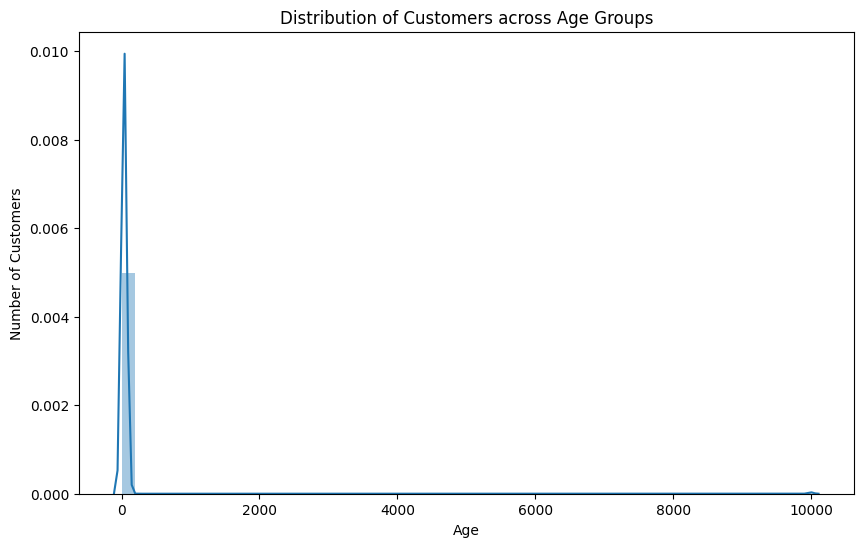

count    653753.000000
mean         65.357427
std         538.575025
min           1.000000
25%          27.000000
50%          33.000000
75%          43.000000
max        9999.000000
Name: Age, dtype: float64

In [10]:
# Distribution of customers across age groups
plt.figure(figsize=(10,6))
sns.distplot(df['Age'])
plt.title('Distribution of Customers across Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

# Descriptive statistics of age column
df['Age'].describe()

**Observation**: As we can see the maximum age is 9999. This proves our hypothesis that there will be outliers present in the age column as some customers might have entered invalid age.

In [11]:
# let's see the sorted age values
df['Age'].sort_values()

222187       1
413353       1
413352       1
413351       1
413350       1
          ... 
34536     9999
34535     9999
110719    9999
380795    9999
142984    9999
Name: Age, Length: 653753, dtype: int64

In [15]:
# How many customers have the age 9999?
df[df['Age']==9999]['Customer ID'].nunique()

276

In [16]:
df['Age'].quantile([0.8,0.9,0.95,0.99])

0.80    47.0
0.90    55.0
0.95    62.0
0.99    75.0
Name: Age, dtype: float64

From the above, 80% of the observations are below the age of 47, 90% below the age of 55 and 99% below the age of 75

In [17]:
#Extreme quantiles
df['Age'].quantile([0.99,0.999,0.99991,0.999999])

0.990000      75.0
0.999000    9999.0
0.999910    9999.0
0.999999    9999.0
Name: Age, dtype: float64

In [19]:
# Hence we will replace every value in age column by greater than 75 by lets say similar values through imputer. 
df['Age'].value_counts().sort_index()

1        8299
19       7714
20      15981
21      14817
22      13789
23      12230
24      12014
25      27994
26      27023
27      27233
28      26872
29      27361
30      27815
31      26259
32      25396
33      26315
34      25718
35      24516
36      15706
37      15053
38      16703
39      16825
40      16761
41      16313
42      10159
43       9406
44       8305
45       8367
46       8320
47      10973
48      10637
49      10754
50      11173
51       4872
52       5081
53       6933
54       6463
55       6709
56       4256
57       3928
58       3985
59       4542
60       4957
61       4978
62       4482
63       4386
64       4625
65       3640
66        714
67        835
68       1099
69       1265
70       1213
71        990
72       1106
73       1078
74       1161
75       1120
76       1053
77       1001
78        988
79       1177
80        400
9999     1915
Name: Age, dtype: int64

Looking at the age values, there are some ages that don't look plausible i.e. 1 & 9999. Let's replace these with NaN

In [27]:
# Replacing Age=9999
df['Age'].replace(9999, np.NaN, inplace=True)

In [26]:
# Now replacing Age=1
df['Age'].replace(1, np.NaN, inplace=True)

In [28]:
# Extreme Quantiles
df['Age'].quantile([0.99,0.999,0.99991,0.999999])

0.990000    74.0
0.999000    79.0
0.999910    80.0
0.999999    80.0
Name: Age, dtype: float64

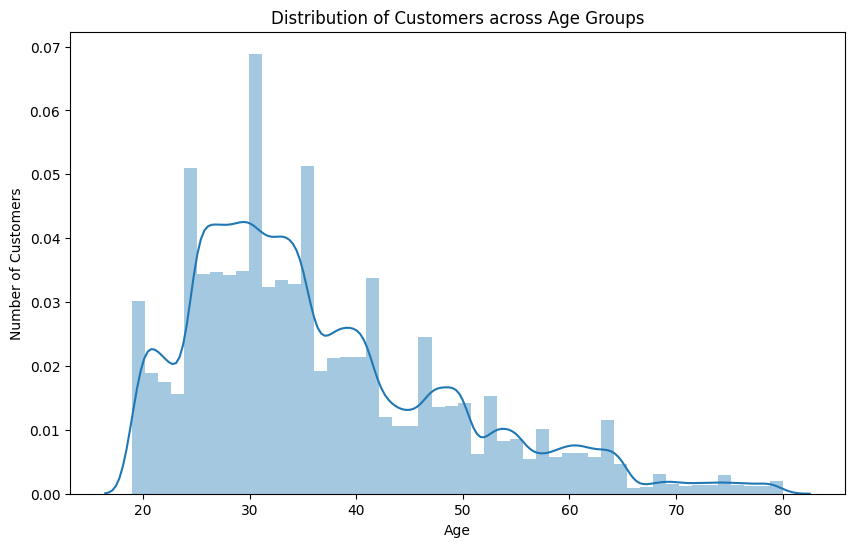

In [29]:
# Distribution of customers across age groups
plt.figure(figsize=(10,6))
sns.distplot(df['Age'])
plt.title('Distribution of Customers across Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

**Observation**: The data now seems to be valid as it also proves our hypothesis of most of the customer ages would be between 20-40.

### **Married**

In [30]:
# Count of each unique value in the 'Married' column including NaN values
df['Married'].value_counts(dropna=False)

Yes              279124
No               276240
Not Specified     84013
NaN               14376
Name: Married, dtype: int64

In [32]:
# Count of unique customer IDs where 'Married' column is NaN
df[df['Married'].isna()]['Customer ID'].nunique()

2179

In [33]:
# Replacing NaN values in the 'Married' column with 'Not Specified'
df['Married'] = df['Married'].fillna('Not Specified')

In [34]:
# Count of each unique value in the 'Married' column after filling NaN values with 'Not Specified'
df['Married'].value_counts(dropna=False)

Yes              279124
No               276240
Not Specified     98389
Name: Married, dtype: int64

### **Dependents**

In [35]:
# Count the number of unique values in "Dependents" column
df['Dependents'].value_counts(dropna=False)

No               320931
Yes              169579
Not Specified    138619
NaN               24624
Name: Dependents, dtype: int64

**Observation**:The Dependents and Number of Dependents columns are linked.

But, for the time being, we will simply replace null with not specified and deal with both columns together in the following section.

In [36]:
# Fill missing values in dependents with "Not Specified"
df['Dependents']=df['Dependents'].fillna('Not Specified')

In [37]:
# Count the number of unique values in "Dependents" column after imputation
df['Dependents'].value_counts(dropna=False)

No               320931
Yes              169579
Not Specified    163243
Name: Dependents, dtype: int64

In [38]:
# Percentage of customers with dependents
percent_with_dependents = (df["Dependents"].value_counts(normalize=True) * 100).loc["Yes"]
preserve("fcTel1")
print(f"Percentage of customers with dependents: {percent_with_dependents:.2f}%")


<IPython.core.display.Javascript object>

Percentage of customers with dependents: 25.94%


In [39]:
(df["Dependents"].value_counts(normalize=True) * 100)

No               49.090559
Yes              25.939307
Not Specified    24.970134
Name: Dependents, dtype: float64

**Observation**: The percentage of customers with dependents gives us insights into the family structure of the customer base. This can help us understand the type of services that are in demand among families and whether there are opportunities to introduce family-oriented plans and promotions. 

### **Number of Dependents**

In [41]:
# Counting the number of unique values in Number of Dependents column
df['Number of Dependents'].value_counts(dropna=False).sort_index()

0      435554
1       79167
2       21156
3       16031
4       39647
6       15137
7       15468
8       13625
9       13023
699      4945
Name: Number of Dependents, dtype: int64

**Observation**: There are no null values in the number of dependents column.

Nonetheless, 699 dependents stand out as an exception in this case. Let's substitute nan and impute them later.

**Problem**:
* Improve customer satisfaction: Customers with no dependents constitute the majority of our customer base and could be used to improve customer satisfaction by offering more accurate and relevant products and services to customers based on their needs. As customers with dependents more likely have a high ARPU, meaning they are more invested and have a lesser risk to churn out. Although, they should be tackled with a whole different strategy to ensure their loyalty.

In [42]:
# Replace 699 with Nan
df.loc[df['Number of Dependents']==699,'Number of Dependents']=np.nan

In [43]:
# Count the frequency of unique values in the 'Dependents' and 'Number of Dependents' columns
df[['Dependents','Number of Dependents']].value_counts(dropna=False)

Dependents     Number of Dependents
No             0.0                     254060
Not Specified  0.0                     108943
Yes            0.0                      72551
No             1.0                      45190
Not Specified  1.0                      19096
No             4.0                      18002
Yes            2.0                      15926
               1.0                      14881
               3.0                      11908
               4.0                      11696
               7.0                      11532
               6.0                      11186
               8.0                      10295
Not Specified  4.0                       9949
Yes            9.0                       9604
Not Specified  2.0                       5230
               3.0                       4123
               6.0                       3951
               7.0                       3936
No             NaN                       3679
Not Specified  9.0                       341

**Observation**: 
* Some rows have NaN values in 'Dependents' column and 'Number of Dependents' column has value 0 for those rows.

* It seems ambiguous as the 'Dependents' column indicates that the customer has dependents but the 'Number of Dependents' is 0.

* It is recommended to check with the business team for clarification.

### **Location ID and Service ID**

In [44]:
df['Location ID'].nunique()

98230

In [45]:
df['Service ID'].nunique()

98230

In [47]:
df.head()

Customer ID  Month of Joining  Month  zip_code  Gender   Age Married  \
0  hthjctifkiudi0                 1      1     71638  Female  36.0      No   
1  uqdtniwvxqzeu1                 6      6     72566    Male   NaN      No   
2  uqdtniwvxqzeu1                 6      7     72566    Male   NaN      No   
3  uqdtniwvxqzeu1                 6      8     72566    Male   NaN      No   
4  uqdtniwvxqzeu1                 6      9     72566    Male   NaN      No   

  Dependents  Number of Dependents    Location ID           Service ID state  \
0         No                   0.0  jeavwsrtakgq0  bfbrnsqreveeuafgps0    AR   
1         No                   0.0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1    AR   
2         No                   0.0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1    AR   
3         No                   0.0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1    AR   
4         No                   0.0  qcvetdmalnkw1  tkqnsqflrdatnqapsh1    AR   

          county         timezone  area_codes country  latitude  longitude  \
0  Chicot County  America/Chicago       870.0      US     33.52     -91.43   
1   Izard County  America/Chicago       870.0      US     36.22     -92.08   
2   Izard County  America/Chicago       870.0      US     36.22     -92.08   
3   Izard County  America/Chicago       870.0      US     36.22     -92.08   
4   Izard County  America/Chicago       870.0      US     36.22     -92.08   

     arpu  roam_ic  roam_og  loc_og_t2t  loc_og_t2m  loc_og_t2f  loc_og_t2c  \
0  273.07    18.88    78.59      280.32       30.97        5.71        1.79   
1 -329.96    69.46    72.08      255.73      148.80       30.00        7.61   
2  101.22  1012.60   115.26       52.95         NaN      103.28       15.71   
3  215.48    84.18    99.85      140.51     4006.99      280.86        6.33   
4  636.55     0.00     0.00        0.00        0.00       45.00        0.00   

   std_og_t2t  std_og_t2m  std_og_t2f  std_og_t2c  isd_og  spl_og   og_others  \
0       25.71      175.56        0.47         0.0    5.11    0.65       13.99   
1      308.29      265.20       10.82         0.0    1.23  905.51        1.69   
2      244.20       15.19         NaN         NaN   13.14  455.15      115.63   
3      346.14      103.15      183.53         0.0   33.88  495.60       14.01   
4        0.00        0.00       45.00         0.0    0.00    0.00  8787978.00   

   loc_ic_t2t  loc_ic_t2m  loc_ic_t2f  std_ic_t2t  std_ic_t2m  std_ic_t2f  \
0      121.51      168.40       67.61      115.69       52.22       18.71   
1      212.93      155.19       29.04        9.15       38.89        0.84   
2      121.80      699.39       44.49       83.59      914.70       13.25   
3      658.96      195.02      144.11       50.18        2.35      623.94   
4      138.85      201.92       19.89       15.91       23.78       16.01   

   std_ic_t2o  spl_ic  isd_ic  ic_others total_rech_amt total_rech_data  \
0         0.0    0.26   11.53      46.42             18             NaN   
1         0.0    0.05   32.51      25.53           1183               0   
2         0.0    0.06   13.05       5.62            295               7   
3         0.0    0.07   69.13      10.62            354               1   
4         0.0    0.03   64.35      36.18              0             NaN   

   vol_4g  vol_5g  arpu_5g  arpu_4g  night_pck_user  fb_user  aug_vbc_5g  \
0   38.30  219.25      NaN      NaN             NaN      NaN      214.99   
1    0.00    0.00     0.00     0.00             0.0      1.0        0.00   
2   14.83  967.95    -9.40   106.30             1.0      1.0       85.87   
3  264.90  268.11    -5.15    77.53             0.0      1.0      268.38   
4   52.78  370.59      NaN      NaN             NaN      NaN      399.84   

   Churn Value Referred a Friend  Number of Referrals Phone Service  \
0            1               Yes                  9.0           Yes   
1            0                No                  0.0           Yes   
2            0               Yes         

**Observation**: It appears that each customer ID has a distinct Location ID and Service ID and they go hand in hand.

In [48]:
# Using value_counts() method to get the count of unique values for Location ID and Service ID columns
df[['Location ID','Service ID']].value_counts(dropna=False)

Location ID         Service ID              
hlrjtcmwztmd130753  enaqvnivkxydixfyqm130753    14
jscprjytujws25932   bfryykgvokxkyfznot25932     14
llgnltpyyoun38767   jsggccqjebwceilwmz38767     14
legwdrxdiaro61600   ntahpedsuygrdtopia61600     14
uvucxidcaizg61475   amgakuqbjlubbntjls61475     14
                                                ..
wsuvsaqtrotn58881   yzcskeospoebdbpzxu58881      1
wswcpmvctflk25234   lpulhrynhoujhifter25234      1
jikgwoxcifwl86729   stdluukccrzawlvstx86729      1
jijxolpufjvz18051   vtcqteigmpqmukrium18051      1
zzzzvucoqifl133665  kcvdllqcwoedvhxtdr133665     1
Length: 98230, dtype: int64

**Observation**: The counts of unique values for Location ID and Service ID columns are almost same which indicates that location ID and service ID are related to each other and thus our assumption is proved.

### **State**

In [49]:
# Count the unique values of State column
df['state'].value_counts(dropna=False)

CA    383500
WA    105313
AR    103551
NM     61389
Name: state, dtype: int64

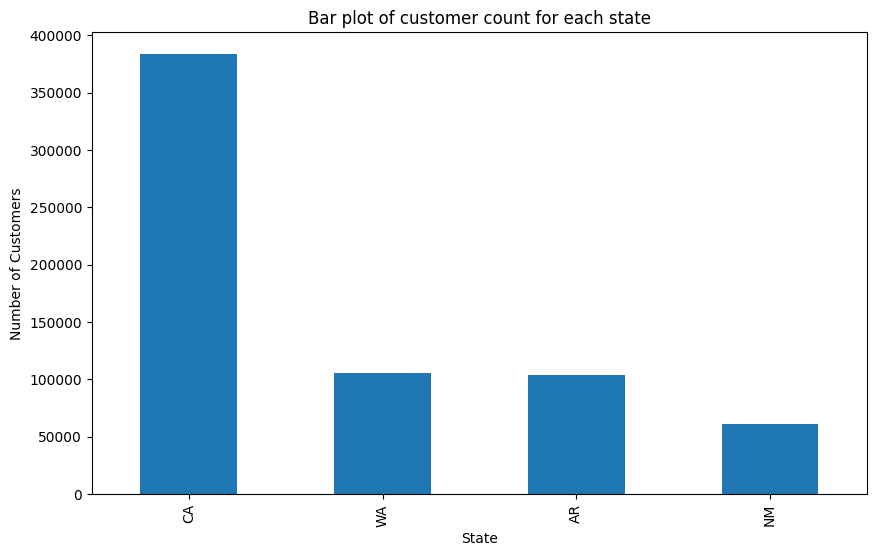

In [50]:
# Bar plot of customer count for each state
plt.figure(figsize=(10,6))
df['state'].value_counts(dropna=False).plot.bar()
plt.title('Bar plot of customer count for each state')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.show()

In [51]:
# Grouping by state and calculating unique customer count
df.groupby(['state'],as_index=False).agg(Number_of_customers=('Customer ID','nunique'))

state  Number_of_customers
0    AR                15521
1    CA                57665
2    NM                 9209
3    WA                15835

**Observation**:  It can be observed that the maximum number of customers are from California with 57665 Customers IDs.

We earlier saw that the normal distribution of zip codes suggests that customers are evenly distributed across zip codes. 

**Hypothesis**:

* It is possible that the state of California has a large number of zip codes among other states. 


In [52]:
# Count the number of unique zip codes per state
df.groupby('state')['zip_code'].nunique()

state
AR     712
CA    2655
NM     428
WA     733
Name: zip_code, dtype: int64

**Hypotheses and Problems**


Hypotheses that can be deduced:


* The telecom service provider has a strong presence in California, leading to a higher customer base.

* Customers from California have higher mobile phone usage compared to other states, leading to more subscriptions with the telecom service provider.


These conclusions also lead to the following problems:

* Location-based marketing strategy: The insight that the majority of customers are from California could be used to develop a location-based marketing strategy that targets customers in this state with customized offers, campaigns, and promotions.

* Improve customer distribution: Analyze and bring in more customers from other states to even out the customer distribution and ensure the company is not overly reliant on a particular area.



### **County**

In [53]:
# Group by county and calculate number of unique customers in each county
df.groupby(['county'],as_index=False).agg(Number_of_customers=('Customer ID','nunique')).sort_values(by=['Number_of_customers'])

county  Number_of_customers
51          Garfield County                   17
99          Mckinley County                   28
89        Los Alamos County                   37
38           De Baca County                   58
91              Luna County                   61
19            Chicot County                   63
58           Harding County                   67
6             Asotin County                   73
182        Wahkiakum County                   77
2             Alpine County                   79
14           Calhoun County                   80
37            Dallas County                   81
25         Cleveland County                   82
160         Skamania County                   89
78         Lafayette County                   93
62            Howard County                   94
0              Adams County                   95
151            Scott County                   96
43              Drew County                   96
61        Hot Spring County                   96
60           Hidalgo County                   99
137       San Benito County                  109
11           Bradley County                  110
106           Monroe County                  112
57         Guadalupe County                  114
116         Ouachita County                  115
119            Perry County                  115
154           Sevier County                  116
102           Miller County                  119
39         Del Norte County                  122
118     Pend Oreille County                  131
35             Cross County                  132
188         Woodruff County                  133
83               Lee County                  134
17            Chaves County                  135
152           Searcy County                  135
53             Glenn County                  136
86      Little River County                  137
5             Ashley County                  143
15           Carroll County                  143
126             Polk County                  143
128          Prairie County                  144
131         Randolph County                  144
71           Johnson County                  144
56            Greene County                  148
10             Boone County                  151
180        Van Buren County                  154
105             Mono County                  156
28            Colusa County                  159
122             Pike County                  160
169            Stone County                  161
16            Catron County                  162
183      Walla Walla County                  163
93           Madison County                  163
42           Douglas County                  164
67            Island County                  166
155            Sharp County                  167
47             Ferry County                  168
179         Valencia County                  169
27          Columbia County                  172
96          Mariposa County                  175
40             Desha County                  175
59         Hempstead County                  180
26            Colfax County                  181
108       Montgomery County                  181
44              Eddy County                  182
74             Kings County                  182
36             Curry County                  190
69           Jackson County                  192
130             Quay County                  192
162          Socorro County                  193
76          Kittitas County                  193
125         Poinsett County                  197
4           Arkansas County                  197
30            Conway County                  199
95            Marion County                  207
127             Pope County                  207
174         Torrance County                  208
170           Sutter County                  209
97             Mason County                  209
104            Modoc County                  217
134

In [54]:
# Count the number of missing values in county column
df['county'].isna().sum()

918

**Observations**:

* Los Angeles has the highest number of customers while Garfield county has the lowest number of customers.

* There are 918 missing values in the county column.

**Hypotheses**:

* Customers in densely populated areas (like Los Angeles) may have different preferences and behaviors compared to customers in less populated areas (like Garfield county).

Analyzing customer preferences and behaviors in different locations can help the company target their marketing and promotional strategies effectively.

In [56]:
# Finding the values of state, latitude and longitude where county is missing
df[df['county'].isna()][['state','latitude','longitude']].value_counts()

state  latitude  longitude
WA     47.42     -122.25      198
AR     34.75     -92.27       191
NM     35.82     -106.20      179
WA     47.85     -122.22      131
NM     32.99     -106.97      112
CA     37.95     -121.29      107
dtype: int64

In [58]:
# Finding the county for specific latitude and longitude values
df[(df.latitude==32.99)&(df.longitude==-106.97)]['county'].value_counts(dropna=False)

NaN    112
Name: county, dtype: int64

In [59]:
# Finding the county for specific latitude and longitude values
df[(df.latitude==34.75)&(df.longitude==-92.27)]['county'].value_counts(dropna=False)

NaN    191
Name: county, dtype: int64

In [60]:
# Finding the county for specific latitude and longitude values
df[(df.latitude==47.85)&(df.longitude==-122.22)]['county'].value_counts(dropna=False)

NaN    131
Name: county, dtype: int64

In [62]:
# Replacing missing values in county with 'Unknown'
df['county']=df['county'].fillna('Unknown')

**Observation**:
We see that there are some values of latitude and longitude for which the county value is missing (NaN). To fill in these missing values, we can find the county corresponding to those latitude and longitude values. However, for this exercise, we will simply replace the missing county values with 'Unknown'.

### **Timezone**

In [63]:
# Count the number of customers in each timezone
df['timezone'].value_counts(dropna=False)

America/Los_Angeles    488813
America/Chicago        103404
America/Denver          61389
NaN                       147
Name: timezone, dtype: int64

In [71]:
# Identify the customers with missing timezone and their state and county information
df[df['timezone'].isna()][['state','county']].value_counts(dropna=False)

state  county          
AR     Craighead County    147
dtype: int64

In [72]:
# Check the unique timezone value for customers in Craighead County
df[df.county=='Craighead County'].timezone.unique()

array([nan, 'America/Chicago'], dtype=object)

Since all of the customers missing timezone belong to Craighead county, let's fill the missing values with that timezone

In [73]:
# Fill the missing timezone values with "America/Chicago" 
df['timezone']=df['timezone'].fillna('America/Chicago')

**Hypothesis**:

* Customers in different timezones may have different calling behavior or usage patterns, which can affect the revenue or service quality of the company.

We'll have to analyze

### **Area Codes**

In [8]:
# Count the values of area codes
df['area_codes'].value_counts(dropna=False)

8.700000e+02    58440
5.050000e+02    42415
NaN             39657
5.090000e+02    38585
5.300000e+02    32844
3.600000e+02    31031
5.590000e+02    22731
7.070000e+02    22095
2.090000e+02    21601
9.160000e+02    19833
5.010000e+02    19443
4.790000e+02    18577
5.750000e+02    17872
7.600000e+02    16975
8.050000e+02    16441
6.190000e+02    14822
2.130000e+02    14727
4.150000e+02    11374
6.610000e+02    10954
2.530000e+02    10852
6.260000e+02    10382
5.100000e+02    10001
4.080000e+02     9844
7.140000e+02     9372
9.090000e+02     8873
5.620000e+02     7832
2.060000e+02     7236
9.510000e+02     7165
4.250000e+02     6667
6.500000e+02     6590
8.310000e+02     6385
3.100000e+02     5600
8.180000e+02     5428
9.250000e+02     4984
9.490000e+02     4228
3.230000e+02     4038
6.577140e+05     2973
4.427600e+05     2823
3.104240e+05     2706
9.099510e+05     2320
6.198580e+05     1942
3.236260e+05     1661
7.478180e+05     1651
5.309160e+05     1618
7.149490e+05     1482
4.086690e+

There are some missing values. Let us explore deeper.

In [9]:
# Count the values of state and county for missing values of area codes
df[df['area_codes'].isna()][['state','county']].value_counts(dropna=False)

state  county                
CA     San Bernardino County     4339
       Los Angeles County        2837
WA     Pierce County             1944
CA     El Dorado County          1921
       Placer County             1709
       Kern County               1572
AR     Independence County       1540
CA     Marin County              1389
WA     King County               1375
CA     Trinity County            1366
       Contra Costa County       1241
       San Diego County          1228
WA     Kitsap County             1102
CA     Riverside County          1087
       Monterey County           1065
       Yolo County                962
WA     Snohomish County           839
CA     San Mateo County           831
       Humboldt County            821
AR     Jackson County             785
CA     San Luis Obispo County     682
       Santa Barbara County       620
AR     Jefferson County           587
       Cleburne County            526
CA     Orange County              489
       Sacramento Co

Let's see if one county has only one area codes value.

In [10]:
# Count the values of County and area codes
df[['county','area_codes']].value_counts(dropna=False)

county                 area_codes
Sacramento County      916.0         18145
San Diego County       619.0         14822
Los Angeles County     213.0         14727
Fresno County          559.0         14412
Los Angeles County     626.0         10382
                                     ...  
Luna County            575.0            83
San Diego County       619760.0         79
El Dorado County       530209.0         74
Mono County            530.0            73
San Bernardino County  661760.0         64
Length: 507, dtype: int64

**Observation**:
As we can see, San Diego County has at least two area codes. As a result, no two counties share the same area code.

let us simply replace na with unknown

In [17]:
# Filling the missing value with Unknown
df['area_codes']=df['area_codes'].fillna('Unknown')

### **Latitude and Longitude**

In [18]:
# Check the number of nulls in latitude
df['latitude'].isna().sum()

0

In [20]:
# Check the number of nulls in latitude
df['longitude'].isna().sum()

0

In [21]:
# Count the unique values of latitude and longitude
df[['latitude','longitude']].value_counts()

latitude  longitude
38.58     -121.49      6584
35.11     -106.62      3382
47.61     -122.33      2177
34.72     -92.35       2012
38.55     -121.49      1886
                       ... 
47.62     -122.02        52
47.65     -122.55        49
32.87     -114.72        49
35.34     -115.43        46
36.03     -93.92         45
Length: 4108, dtype: int64

Are the max customers from California?

In [22]:
# Checking if the latitude and longitude values are from CA
df[df['latitude']==38.58][['latitude', 'longitude', 'state']].value_counts()

latitude  longitude  state
38.58     -121.49    CA       6584
          -121.37    CA        154
          -121.30    CA        100
dtype: int64

In [23]:
df[df['latitude']==35.11][['latitude', 'longitude', 'state']].value_counts()

latitude  longitude  state
35.11     -106.62    NM       3382
          -106.58    NM        191
          -107.88    NM        187
          -91.82     AR        118
          -93.52     AR        112
          -103.32    NM         85
dtype: int64

### **Average Revenue per User (ARPU)**

Some hypotheses for univariate analysis are:

* We don't know which customers have been good or bad to the company.

* The distribution of arpu values might be skewed. The median arpu might be a better measure of central tendency than the mean arpu.

* There might be some outliers in arpu values.

In [24]:
# Check the null values in ARPU
df['arpu'].isna().sum()

0

<IPython.core.display.Javascript object>

<Figure size 1000x600 with 0 Axes>

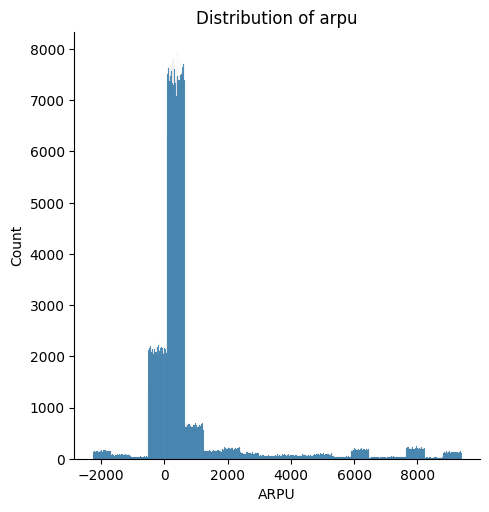

In [25]:
# Distribution plot
preserve("fcTel1")
plt.figure(figsize=(10,6))
sns.displot(df['arpu'])
plt.title('Distribution of arpu')
plt.xlabel('ARPU')
plt.ylabel('Count')
plt.show()

**Observation**:

* The distribution of ARPU values is right-skewed, with most values concentrated below 500 which indicates very high ARPU values for a few customers proving our hypotheses.

* There are some negative ARPU values, which may be due to refunds. A negative ARPU means that the company is losing money on a per-user basis, rather than making a profit. It is not uncommon for telecom companies to have negative ARPU due to the high costs associated with acquiring and servicing customers.

In [26]:
# ARPU is negative here.
# Lets investigate
df.arpu.describe()

count    653753.000000
mean        781.196280
std        1807.269437
min       -2258.680000
25%         118.940000
50%         348.540000
75%         580.650000
max        9394.500000
Name: arpu, dtype: float64

In [29]:
# Now let us investigate how many people have negative arpu

df[df['arpu']<0].shape[0]

115942

In [31]:
# Let's calculate the percentage
115942/df.shape[0]

0.17734832574382067

**Observation**:

The fact that 17% of the people have negative arpu means that a significant proportion of the customer base is not generating revenue for the telecom company. 

This could be due to a number of reasons, such as inactive accounts, delinquent accounts, or accounts with outstanding balances. 

To understand more about this issue, we can investigate other variables that may be related to negative arpu, such as churn status. We can also look at the distribution of negative arpu values across different demographic groups, such as age, gender, and location, to see if there are any patterns or trends. 

Additionally, we can explore whether there are any correlations between negative arpu and other variables, such as usage patterns, service subscriptions, and customer satisfaction scores to understand what's causing this behaviour.

Overall, further investigation is needed to fully understand the implications of negative arpu for the telecom company.

### **Average revenue per user over 4G  and 5G network (ARPU 4G & ARPU 5G)**

In [32]:
# Check nulls
df['arpu_4g'].isna().sum()

212319

In [33]:
# Check nulls
df['arpu_5g'].isna().sum()

210855

In [34]:
(df['arpu_5g']+df['arpu_4g']==df['arpu']).value_counts(dropna=False)

False    653749
True          4
dtype: int64

**Observation**: arpu_4g and arpu_5g does not add up to give overall arpu. 

**Hypothesis**:

`Overall ARPU = arpu_4g + arpu_5g + other_arpu_components`

where `other_arpu_components` represent the revenue generated from other sources such as voice calls, messaging, and data usage on 2G and 3G networks.

In [37]:
# Frequency count of different values in the 'total_rech_data' column for users 
# who did not have any data recharge and also have missing values in 
# both 'arpu_4g' and 'arpu_5g' columns
df[(df['arpu_4g'].isna())&(df['arpu_5g'].isna())]['total_rech_data'].value_counts(dropna=False)

NaN    195182
13        802
30        744
26        725
27        711
12        656
16        583
29        458
25        386
31        370
19        332
15        317
32        159
18        152
24         97
20         41
Name: total_rech_data, dtype: int64

**Observation**:

* Maximum values with no `arpu_4g` and `arpu_5g` have no recharge for internet service, then it's safe to assume that the null values in arpu_4g and arpu_5g also represent customers who have not recharged for internet service. We will impute this values once we analyze the `total_rech_data` variable.

### **Night Pack User**

In [41]:
# Check the value counts
df['night_pck_user'].value_counts(dropna=False)

NaN    373103
0.0    219570
1.0     61080
Name: night_pck_user, dtype: int64

**Observation**: Since the `night_pck_user` column has more than 50% missing values, it's not wise to impute those missing values as it may lead to biased results. So, it's better to keep the NaNs as they are and analyze the available data.

### **Facebook User - Social Networking Scheme** 

In [42]:
# Check the counts of unique values in fb user column
df['fb_user'].value_counts(dropna=False)

NaN    410394
1.0    193664
0.0     49695
Name: fb_user, dtype: int64

### **Volume Based cost for 5G network (outside the scheme paid based on extra usage)**

In [43]:
# statistics for aug_vbc_5g
df['aug_vbc_5g'].describe()

count    653753.000000
mean       6145.362554
std       35849.567900
min           0.000000
25%           0.000000
50%         118.030000
75%         322.920000
max      254687.000000
Name: aug_vbc_5g, dtype: float64

Text(0, 0.5, 'Density')

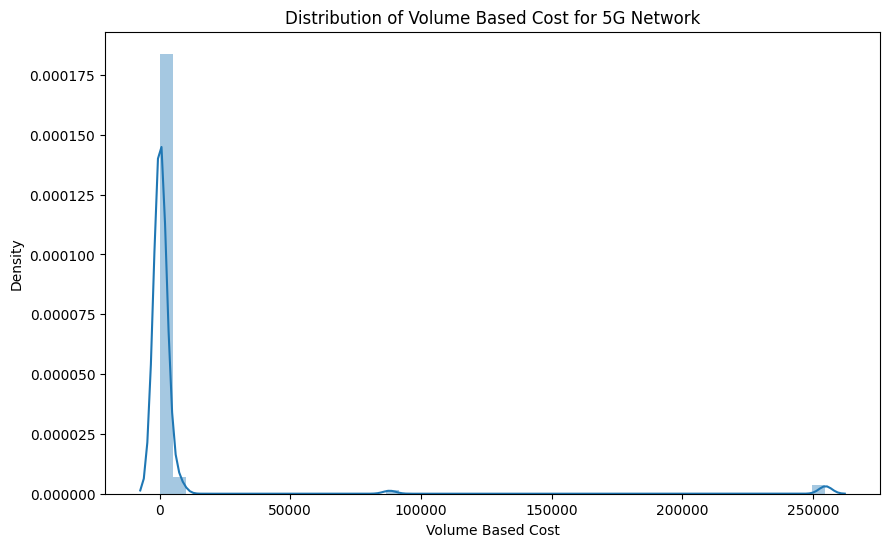

In [44]:
# Plot distribution of aug_vbc_5g
plt.figure(figsize=(10,6))
sns.distplot(df['aug_vbc_5g'])

# Add title and labels to the plot
plt.title('Distribution of Volume Based Cost for 5G Network')
plt.xlabel('Volume Based Cost')
plt.ylabel('Density')

**Hypotheses**:

* The distribution of aug_vbc_5g may have outliers.

* The max value of 254687 may not be a correct value.

In [45]:
# Max value of aug_vbc_5g
df['aug_vbc_5g'].quantile([0.8,0.9,0.95,0.99])

0.80       363.630
0.90      1845.418
0.95      6470.342
0.99    254687.000
Name: aug_vbc_5g, dtype: float64

In [46]:
# So we are having problems in 99th percentile
df['aug_vbc_5g'].quantile([0.99,0.999,0.9999])

0.9900    254687.0
0.9990    254687.0
0.9999    254687.0
Name: aug_vbc_5g, dtype: float64

In [65]:
# Get the unique aug_vbc_5g values 
arr = df['aug_vbc_5g'].unique()
# Sort it in descending order
sorted_arr_desc = np.sort(arr)[::-1]
# print the first 5 
sorted_arr_desc[:5]

array([254687.  ,  87978.  ,   8214.87,   8214.75,   8214.7 ])

In [90]:
# Print the value with thousand separators using an f-string
customers_254687 = df[df['aug_vbc_5g']==254687]['Customer ID'].nunique()
customers_87978 = df[df['aug_vbc_5g']==87978]['Customer ID'].nunique()
print(f"Customers with aug_vbc_5g of 254687: {locale.format_string('%d', customers_254687, grouping=True)}")
print(f"Customers with aug_vbc_5g of 87978: {locale.format_string('%d', customers_87978, grouping=True)}")
print(f"Total customers: {locale.format_string('%d', df['Customer ID'].nunique(), grouping=True)}")

aug_vbc_perc = ((customers_254687 + customers_87978)/df['Customer ID'].nunique())*100

print(f"Percentage of customers with these 2 aug values :{aug_vbc_perc:.1f}%")

Customers with aug_vbc_5g of 254687: 11,852
Customers with aug_vbc_5g of 87978: 4,909
Total customers: 98,230
Percentage of customers with these 2 aug values :17.1%


The top 2 values look way out of range (outliers) and not so realistic. Maybe we replace them with NaN, thus losing 17% of the data

In [91]:
df['aug_vbc_5g'].replace(254687.0, np.NaN, inplace=True)
df['aug_vbc_5g'].replace(87978, np.NaN, inplace=True)

In [92]:
# Investigate max value of aug_vbc_5g
df['aug_vbc_5g'].quantile([0.99,0.999,0.9999])

0.9900    7387.188000
0.9990    8133.496200
0.9999    8204.783995
Name: aug_vbc_5g, dtype: float64

Text(0, 0.5, 'Density')

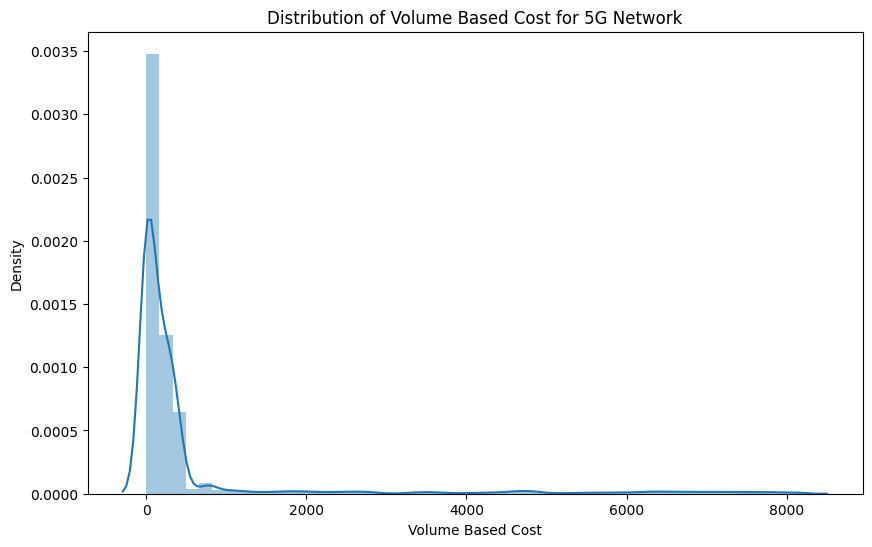

In [93]:
# Plot distribution of aug_vbc_5g again
plt.figure(figsize=(10,6))
sns.distplot(df['aug_vbc_5g'])
# Add title and labels to the plot
plt.title('Distribution of Volume Based Cost for 5G Network')
plt.xlabel('Volume Based Cost')
plt.ylabel('Density')

In [94]:
# Print updated quantiles for aug_vbc_5g
df['aug_vbc_5g'].quantile([0.8, 0.9, 0.99])

0.80     345.920
0.90     789.000
0.99    7387.188
Name: aug_vbc_5g, dtype: float64

### **Churn Value**

In [99]:
# Count the values of churned customers
df['Churn Value'].value_counts(dropna=False)

0    623888
1     29865
Name: Churn Value, dtype: int64

In [100]:
# Normalizing value counts
df['Churn Value'].value_counts(normalize=True)

0    0.954318
1    0.045682
Name: Churn Value, dtype: float64

Lets investigate and find out who make up the 4% of the total records that have churned

In [101]:
# Unique customer IDs and their churn values
cust_churn = df[['Customer ID', 'Churn Value']].drop_duplicates()

# Calculate the percentage of customers who churned out
churn_percent = round((cust_churn['Churn Value'].value_counts()[1] / len(cust_churn)) * 100, 2)

print("Percentage of customers who churned out:", churn_percent, "%")

Percentage of customers who churned out: 24.72 %


In [108]:
cust_churn['Churn Value'].value_counts()

0    90946
1    29865
Name: Churn Value, dtype: int64

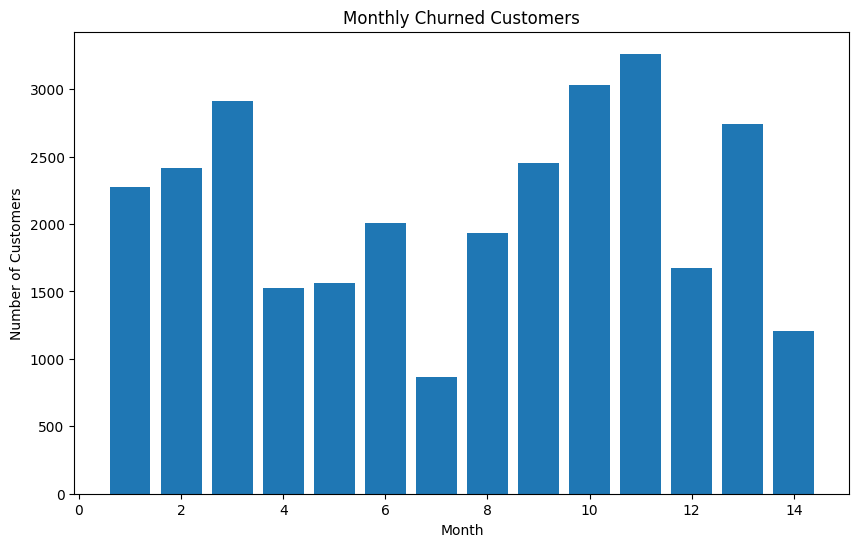

In [109]:
# Convert Month column to integer and filter Churn Value =1
churn_monthly = df[df['Churn Value'] == 1]['Month'].astype(int).value_counts().sort_index()

# Plotting bar chart 
plt.figure(figsize=(10,6))
plt.bar(churn_monthly.index, churn_monthly.values)
plt.title('Monthly Churned Customers')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.show()

**Observation**:

* From the plot, we can see that there is a gradual increase in the number of churned customers from month 7 to month 11. 

* Month 11 has the highest number of churned customers, indicating that there may have been some issue with the services provided during that month that led to customers leaving the network. We will have to analyze this further.

### **Offer**

In [115]:
# Count the unique values in Offer column
df['offer'].value_counts(dropna=False)

NaN    494644
D       16162
C       16153
A       15915
J       15893
B       15871
I       15860
H       15855
E       15833
F       15789
G       15778
Name: offer, dtype: int64

**Observation**: There are a lot of null values in the offer column.

**Hypotheses**: 

* It's possible that the null values in the offer column are due to customers not being eligible for any offers. 

* However, it's also possible that there was an error in recording the data or that some customers were missed when the offers were being given out. 

* We can investigate further by looking at the distribution of offer types and see if there are any patterns based on customer demographics or behavior.

In [117]:
# Filling Nulls with No Offer
df['offer']=df['offer'].fillna('No Offer')

df['offer'].value_counts(dropna=False)

No Offer    494644
D            16162
C            16153
A            15915
J            15893
B            15871
I            15860
H            15855
E            15833
F            15789
G            15778
Name: offer, dtype: int64

In [118]:
# Check the value counts again
df[df['Churn Value']==1]['offer'].value_counts()

No Offer    15292
D            1484
J            1483
H            1477
C            1470
I            1468
A            1464
F            1459
B            1441
E            1418
G            1409
Name: offer, dtype: int64

**Observation**:

* If the offers are distributed in the same way, it suggests that the company has not targeted any specific group of customers with special offers. 

* This could mean that the company is more focused on providing equal benefits to all customers rather than targeting specific segments.

* We can explore the relationship between the offers and customer data, such as age, gender, location, and usage patterns. This could help identify any patterns or preferences among customers that could help with the future marketing strategies. 

* Analyzing the impact of the offers on customer churn could help the company optimize their promotional campaigns.

### **Referred a Friend and Number of Referrals**

In [119]:
# Count the values if a customer referred the company's services to a friend
df['Referred a Friend'].value_counts(dropna=False)

Yes    525449
No     128304
Name: Referred a Friend, dtype: int64

In [120]:
# Here are the number of referrals
df['Number of Referrals'].value_counts(dropna=False)

0.0     167747
1.0      60907
4.0      50033
11.0     48778
7.0      48707
8.0      48136
6.0      46975
3.0      44500
10.0     40923
5.0      36908
2.0      33749
9.0      26003
NaN        387
Name: Number of Referrals, dtype: int64

**Observation**: 

* There are some null values. We can add them later.

* It will be interesting to see both the column of friends referred and the number of referrals together.

In [121]:
# Count the values of Referred a Friend and Number of Referrals
df[['Referred a Friend','Number of Referrals']].value_counts(dropna=False)

Referred a Friend  Number of Referrals
No                 0.0                    111753
Yes                0.0                     55994
                   1.0                     51002
                   4.0                     50033
                   11.0                    48778
                   7.0                     48707
                   8.0                     48136
                   6.0                     46975
                   3.0                     41996
                   10.0                    40923
                   5.0                     36908
                   2.0                     29607
                   9.0                     26003
No                 1.0                      9905
                   2.0                      4142
                   3.0                      2504
Yes                NaN                       387
dtype: int64

**Observations**:

* The majority of customers have answered "no" to the question "Referred a Friend" and have also not made any referrals.

* A small percentage of customers who have answered "no" to the question "Referred a Friend" have made referrals.

* Among the customers who have answered "yes" to the question "Referred a Friend", there is a wide range in the number of referrals made, with some customers having made only one or two referrals while others have made 10-11 as well.

* To further investigate the small percentage of customers who have made referrals despite answering "no" to the question "Referred a Friend", it may be useful to analyze the source of the referrals.

* To incentivize more referrals and increase customer acquisition, the company may want to consider offering referral bonuses or other rewards to customers who successfully refer new customers. 

* The company could analyze the characteristics and behavior of customers who are more likely to make referrals and improve their marketing campaigns.

### **Phone Service**

In [122]:
# Count the value of customers with and without phone service
plt.figure(figsize=(10,6))
df['Phone Service'].value_counts(dropna=False).plot.bar()
plt.title("Distribution of Customers with Phone Service")
plt.ylabel("Count")
plt.show()

**Observation**:

* Phone Service is a popular choice among customers, with over 500,000 customers opting for it over the 14-month period. This suggests that it is an important service for the company to continue offering and investing in.

* It would be interesting to explore the demographics and usage patterns of customers who opted for Phone Service versus those who did not. This could help the company better understand the needs and preferences of its customer base.

### **Internet Service and Internet Type**

In [123]:
# Count the values of the customers with and without Internet Service
df['Internet Service'].value_counts(dropna=False)

Yes    398863
No     254890
Name: Internet Service, dtype: int64

In [132]:
df[df['Internet Service']=='Yes']['Customer ID'].nunique()

93825

**Observation**:

* About 400,000 customers (not unique) [93,825 unique] have opted for internet service over 14 months.

* To gain more insights, we can combine this observation with other columns like churn value, total charges, contract type, payment method, and monthly charges, as mentioned earlier. This can help us understand the behavior and preferences of customers who have opted for internet service and identify potential areas for improvement or upselling.

In [133]:
# Count the Internet Type values
df['Internet Type'].value_counts(dropna=False)

NaN            217332
Fiber Optic    134991
Cable          112100
None           107918
DSL             81412
Name: Internet Type, dtype: int64

**Observation**:

* There are four types of internet services offered: Fiber Optic, Cable, DSL, and None.

* Majority of customers have opted for Fiber Optic and Cable internet services.

* There may be cases where the internet service is yes but the internet type is not specified (NaN values).

* There may be cases where the internet service is no but the internet type is specified (which does not make sense).

In [134]:
# Count the values of internet service and type together
df[['Internet Service','Internet Type']].value_counts(dropna=False)

Internet Service  Internet Type
No                NaN              217332
Yes               Fiber Optic      125590
                  Cable            108372
                  None              89098
                  DSL               75803
No                None              18820
                  Fiber Optic        9401
                  DSL                5609
                  Cable              3728
dtype: int64

**Observation**:

* As these are not unique values , they are monthly values for each customer. We'll have to see which customers had internet service for that month or not.

* Some customers have said yes to having internet service but their internet type is none.

* It could mean that the customer has not used the internet during that month. However, it could also mean that there is missing data or the customer is using an unknown type of internet service.

* We can check if there is any usage data available for the customer during that month. If there is usage data available, we can assume that the customer has used the internet and fill the missing value with the most common internet type for that customer. If there is no usage data available, we can leave the value as None.

### **Streaming Data Consumption**

In [7]:
# Check statistics
df['Streaming Data Consumption'].describe()

count    653753.000000
mean         27.574284
std          26.349552
min           0.000000
25%           2.000000
50%          20.000000
75%          49.000000
max          85.000000
Name: Streaming Data Consumption, dtype: float64

* The minimum value is 0 GB, indicating that some customers did not consume any streaming data during the month, while the maximum value is 85 GB.

In [8]:
# Plot
plt.figure(figsize=(10,6))
sns.distplot(df['Streaming Data Consumption'])
plt.xlabel('Streaming Data Consumption')
plt.ylabel('Frequency')
plt.show()

* The highly right skewed distribution of streaming consumption data indicates that a small proportion of customers are consuming a disproportionately large amount of streaming data. 

* From a business perspective, this information could be used to tailor marketing and pricing strategies to target heavy streaming users and to offer them plans that meet their needs. 

* We can further explore how streaming data consumption relates to other columns such as "Streaming Movies" or "Streaming TV" to gain additional insights into customer behavior and preferences with respect to churn value and satisfaction score.

In [9]:
# check null values
df['Streaming Data Consumption'].isna().sum()

0

### **Payment Method**

In [10]:
# Count the unique values of payment method
df['Payment Method'].value_counts(dropna=False)

Bank Withdrawal    374219
Credit Card        231050
Wallet Balance      48484
Name: Payment Method, dtype: int64

In [11]:
df['Payment Method'].isna().sum()

0

### **Customer Satisfaction Score**
* The satisfaction score is an important metric to measure customer satisfaction and loyalty.

In [12]:
# # Count the values each satisfaction score
df['Satisfaction Score'].value_counts(dropna=False)

3    258752
4    133473
5    106567
1    105539
2     49422
Name: Satisfaction Score, dtype: int64

In [13]:
df['Satisfaction Score'].isna().sum()

0

**Observation**:

* Most of the customers have rated their satisfaction with a score of 3.

* A significant number of customers have rated their satisfaction with scores of 1 and 2.

* It is important to investigate why a significant number of customers have rated their satisfaction with lower scores, i.e., 1 and 2.

* Based on the insights obtained from other columns, such as the service type, internet type, and device protection plan, we can analyze whether there is a correlation between these variables and customer satisfaction.

### **Churn Category**

In [14]:
# Count the values of different churn categories
df['Churn Category'].value_counts(dropna=False)

NaN                624017
Support              7538
Dissatisfaction      6001
Competitor           5974
Price                4381
Other                4356
bcvjhdjcb            1190
Attitude              296
Name: Churn Category, dtype: int64

**Observation**:

* The "Churn Category" column has a high percentage of missing values, with NaN accounting for the majority of the values.

* Let's investigate the null values.

In [15]:
# Let's see the churn value for all those observations where churn category is null
df[df['Churn Category'].isna()]['Churn Value'].value_counts(dropna=False)

0    622748
1      1269
Name: Churn Value, dtype: int64

Therefore, if a customer has not churned, we can mark it as not applicable and mark others as unknown.

In [16]:
# Filling null values of churn category as not applicatable where customers did not churn
df.loc[(df['Churn Category'].isna())&(df['Churn Value']==0),'Churn Category']='Not Applicable'

In [17]:
# Filling the churn category as Unknown where churn value was 1
checkpoint('fcTel1')
df.loc[(df['Churn Category'].isna())&(df['Churn Value']==1),'Churn Category']='Unknown'

<IPython.core.display.Javascript object>

In [18]:
# Check the counts again
df['Churn Category'].value_counts(dropna=False)

Not Applicable     622748
Support              7538
Dissatisfaction      6001
Competitor           5974
Price                4381
Other                4356
Unknown              1269
bcvjhdjcb            1190
Attitude              296
Name: Churn Category, dtype: int64

### **Churn Reason**

In [19]:
# Count the values of different churn reasons
df['Churn Reason'].value_counts(dropna=False)

NaN                                          623986
43tgeh                                         1796
Service dissatisfaction                        1555
Lack of self-service on Website                1547
Attitude of support person                     1535
Moved                                          1482
Competitor offered more data                   1481
Competitor had better devices                  1458
Poor expertise of online support               1445
Product dissatisfaction                        1417
Attitude of service provider                   1410
Long distance charges                          1389
Lack of affordable download/upload speed       1381
Competitor made better offer                   1358
Price too high                                 1358
Competitor offered higher download speeds      1352
Poor expertise of phone support                1330
Network reliability                            1311
Extra data charges                             1310
Deceased    

There are some null and absurd values in the churn reason column.

In [20]:
# Count of null churn reasons and their churn value
df[(df['Churn Reason'].isna())]['Churn Value'].value_counts(dropna=False)

0    622169
1      1817
Name: Churn Value, dtype: int64

Similarly, if a customer has not churned, we can simply mark it as not applicable and mark others as unknown.

In [21]:
# Filling the churn reason as not applicable where churn value was 0
df.loc[(df['Churn Reason'].isna())&(df['Churn Value']==0),'Churn Reason']='Not Applicable'

In [22]:
# Filling the churn reason as Unknown where churn value was 1
df.loc[(df['Churn Reason'].isna())&(df['Churn Value']==1),'Churn Reason']='Unknown'

In [23]:
# Check the value counts in the Churn Reason again
df['Churn Reason'].value_counts(dropna=False)

Not Applicable                               622169
Unknown                                        1817
43tgeh                                         1796
Service dissatisfaction                        1555
Lack of self-service on Website                1547
Attitude of support person                     1535
Moved                                          1482
Competitor offered more data                   1481
Competitor had better devices                  1458
Poor expertise of online support               1445
Product dissatisfaction                        1417
Attitude of service provider                   1410
Long distance charges                          1389
Lack of affordable download/upload speed       1381
Competitor made better offer                   1358
Price too high                                 1358
Competitor offered higher download speeds      1352
Poor expertise of phone support                1330
Network reliability                            1311
Extra data c